In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
''' reading dataset '''
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [3]:
''' displaying first 5 rows '''
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
''' shape of data '''
df.shape

(41188, 21)

In [5]:
''' checking null values '''
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [6]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


y
no     36548
yes     4640
Name: count, dtype: int64


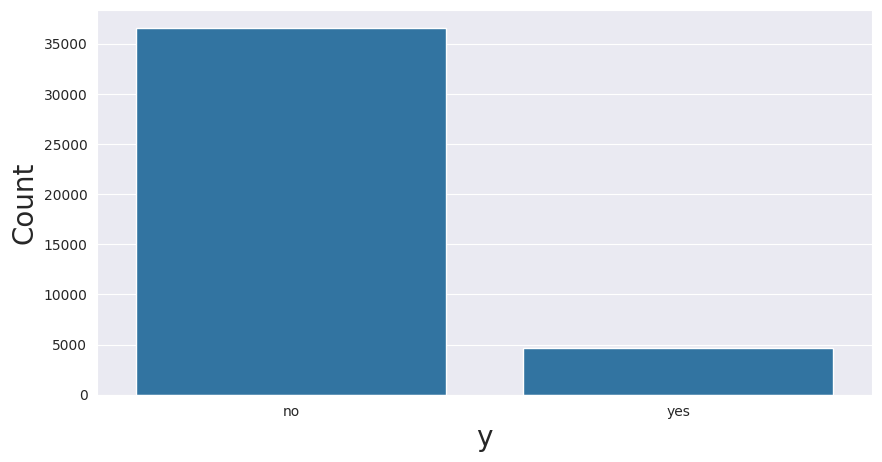

In [12]:
''' value count of y column '''
print(df.y.value_counts())

''' count plot '''
plt.figure(figsize=(10, 5))
sns.countplot(x='y', data=df)
plt.xlabel('y', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

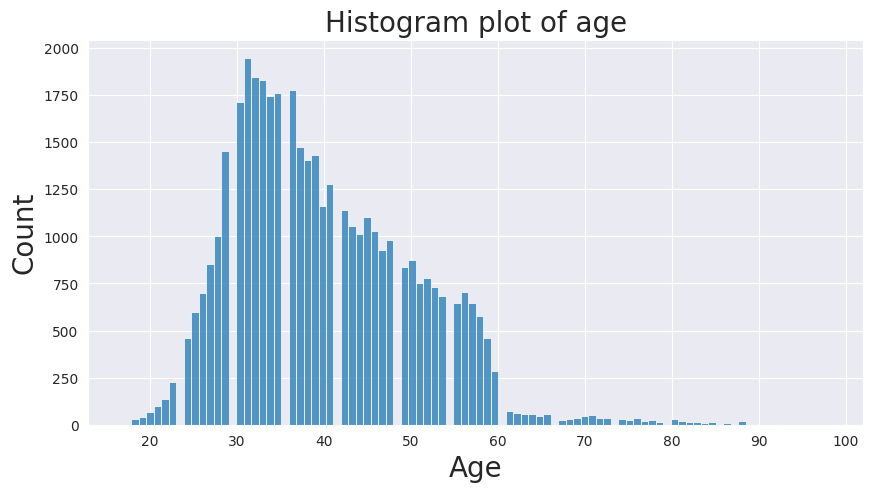

In [14]:
''' histogram plot of age '''
plt.figure(figsize=(10, 5))
sns.histplot(x='age', data=df)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram plot of age', fontsize=20);
plt.show()

In [15]:
''' dropping y column from data '''
df_new = df.drop(['y'],axis=1)

In [16]:
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [18]:
''' there are object features(categorical features) , lets chang them to dummies '''
df_new = pd.get_dummies(df_new)
df_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [19]:
''' checking shape '''
df_new.shape

(41188, 63)

In [20]:
''' scaling '''
sc = StandardScaler()
df_scaled = sc.fit_transform(df_new)

In [21]:
df_scaled

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 3.26029527, -0.07438021,  0.15610492, ...,  2.94732687,
        -2.51442063, -0.1857    ]])

In [25]:
''' KMeans clustering '''

''' taking only 2 clusters '''
knn = KMeans(n_clusters=2)

''' fit on data '''
knn_ = knn.fit_predict(df_scaled)

In [26]:
df['cluster'] = knn_

''' cluster and y column from df '''
df[['cluster', 'y']]

,cluster,y
0,1,no
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
41183,0,yes
41184,0,no
41185,0,no
41186,0,yes


In [27]:
''' lets check if y is cluster_label or not!'''
pred = knn_
y_test =df['y']
y_test1, y_test2 = [],[]
for i in y_test:
    if i == 'yes':
      y_test1.append(1)
      y_test2.append(0)
    else:
      y_test1.append(0)
      y_test2.append(1)

''' accuracy score '''
acc_1 = accuracy_score(y_test1 , pred)
acc_2 = accuracy_score(y_test2 , pred)
print('if consider 1 in column cluster_label as yes then the acuracy of this column be the column y will be %f, otherwise the accuracy will be %f'%(acc_1,acc_2))

if consider 1 in column cluster_label as yes then the acuracy of this column be the column y will be 0.296688, otherwise the accuracy will be 0.703312
